## Data Science for Good Challenge

[Original Kaggle page](https://www.kaggle.com/passnyc/data-science-for-good/home)

### Aim

Improve the chances of students taking the SHSAT and receiving placements in specialized high schools.

### What is PASSNYC?

PASSNYC is a not-for-profit, volunteer organization dedicated to broadening educational opportunities for New York City's talented underserved students.

Promoting Access to Specialized Schools in New York City ("PASSNYC") will focus our efforts in underperforming areas that are historically underrepresented in SHSAT registration. In so doing, PASSNYC will help pave the path to specialized high schools for a more diverse group of students.

PASSNYC aims to identify talented underserved students within New York City’s underperforming school districts in order to increase the diversity of students taking the Specialized High School Admissions Test.

Here's what PASSNYC does:

* Partner with NYC middle schools and communities in underperforming school districts to increase awareness of SHSAT

* Identify high-performing students through a combination of interviews, standardized test performance, grades, and educator testimonials.

* Prepare scholars for SHSAT by connecting with select mentoring and test prep programs.

* 

### What is SHSAT?

The Specialized High Schools Admissions Test (SHSAT) is an examination administered to eighth and ninth grade students residing in New York City and used to determine admission to all but one of the city's nine Specialized High Schools. In 2008, about 29,000 students took the test, and 6,108 students were offered admission to one of the high schools based on the results.[1] On average, 30,000 students take this exam annually.

### What are Specialized High Schools?

The specialized high schools of New York City are nine selective public high schools, established and run by the New York City Department of Education to serve the needs of academically and artistically gifted students. The Specialized High Schools Admissions Test (SHSAT) examination is required for admission to all the schools except LaGuardia, which requires an audition or portfolio for admission.

### Output

We want to put out a "potential for outreach" for each school.

Past proxies include data on:
* English language learners
* Students with disabilities
* Students on free/reduced lunch
* Students with temporary housing

### Impact

The best solutions will enable PASSNYC to identify the schools where minority and underserved students stand to gain the most from services like after-school programs, test preparation, mentoring, or resources for parents.

### Judgement Criteria

* Performance: Clearly articulate why your solution is effective at tackling the problem.
* Influential: Be easy to understand enable PASSNYC to convince stakeholders where services are needed the most.
* Shareable: PASSNYC works with over 60 partner organizations to offer services such as test preparation, tutoring, mentoring, extracurricular programs, educational consultants, community and student groups, trade associations, and more. Winning submissions will be able to provide convincing insights to a wide subset of these organizations. 

## Reading data

First, let us read the dataset and do some initial exploratory analysis.

In [8]:
import pandas as pd
import numpy as np

school_df = pd.read_csv('2016_school_explorer.csv')
shsat_df = pd.read_csv('d5_shsat_registrations_and_testers.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [9]:
display(school_df)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

Some of the columns are interesting.

* Adjusted grade, "New?", "Other location code" have NaNs.  Need further exploration.
* SED Code is "State Education Dept Code"
* The following are useful for geographical clustering: Location code, district, latitude, longitude, address, city, zip.
* Grades, Grade Low, Grade High gives a sense of the size of school.
* "Community School?" tells whether the school receives extra support: The program pairs selected schools with community based organizations that focus on social and emotional support and development.
* "Economic Need Index" reflects the socioeconomics of the school population.  It is calculated using the following formula:
$$ENI = TemporaryHousing\% + \frac{1}{2} HRAeligible\% + \frac{1}{2} FreeLunchEligible\% $$
* XXX: "School Income Estimate": Don't know
* ELL (English Language Learner) is a proxy for a non-native student, who may benefit: English-language learners, or ELLs, are students who are unable to communicate fluently or learn effectively in English, who often come from non-English-speaking homes and backgrounds, and who typically require specialized or modified instruction in both the English language and in their academic courses.
* Asian / Black / Hispanic / White: to identify underrepresented races.
* "Student attendance rate" and "Percentage of students chronically absent" can be a proxy for students who are distracted from learning.
* XXX: "Rigorous instruction %": Don't know
* XXX: "Collaborative teachers %": Don't know
* XXX: "Supportive environment": Don't know
* XXX: "Effective school leadership": Don't know
* XXX: "Strong family-community ties": Don't know
* XXX: "Trust": Don't know
* XXX: "Student achievement rating": Don't know
* ELA proficiency (English Language Arts), Math proficiency: we can use both to gauge student performance
* "4s" columns: shows highest performing students across grades and races (4s is state standards, 4 is highest performance)


Let us do some cleanup of the data.  [Source](https://www.kaggle.com/randylaosat/simple-exploratory-data-analysis-passnyc)

In [2]:
import re

# Remove percent and convert to float
percent_columns = [
    'Percent of Students Chronically Absent',
    'Rigorous Instruction %',
    'Collaborative Teachers %',
    'Supportive Environment %',
    'Effective School Leadership %',
    'Strong Family-Community Ties %',
    'Trust %',
    'Student Attendance Rate',
    'Percent ELL',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic',
    'Percent Black / Hispanic',
    'Percent White',
]
for col in percent_columns:
    school_df[col] = school_df[col].astype(str).apply(lambda s: float(s.strip('%')) / 100)
# Remove $ and , for income column
school_df['School Income Estimate'] = school_df['School Income Estimate'].astype(str).apply(lambda s: float(re.sub('[$,]', '', s)))

# Having spaces etc. can cause annoying problems: replace with underscores
def sanitize_columns(c):
    c = c.lower()
    c = re.sub('[?,()/]', '', c)
    c = re.sub('[ -]', '_', c)
    c = c.replace('%', 'percent')
    return c
school_df.columns = [sanitize_columns(c) for c in school_df.columns]

Now let us have another look at the data.

In [ ]:
display(school_df)

Let us look at some individual columns which seem to have a lot of "NaN"s.

In [ ]:
nulls_df = school_df.isnull()
display(nulls_df.query('adjusted_grade == False'))

count    1247.000000
mean        0.672281
std         0.210959
min         0.049000
25%         0.550000
50%         0.731000
75%         0.841000
max         0.957000
Name: economic_need_index, dtype: float64


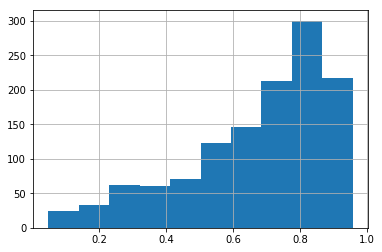

In [6]:
import matplotlib.pyplot as plt
print(school_df['economic_need_index'].describe())
display(school_df['economic_need_index'].hist())

## NYTimes School Data

We also have NYTimes data.  Let us read it and have a first look.

In [56]:
nyt_df = pd.read_csv('nytdf.csv')

In [57]:
display(nyt_df)

,DBN,DataName,SchoolName1,SchoolName2,NumSHSATTestTakers,NumSpecializedOffers,OffersPerStudent,PctBlackOrHispanic
0,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,Intermediate School 187,The Christa McAuliffe School,251,205,75%,8%
1,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,Intermediate School 239,The Mark Twain Intermediate School for the Gif...,336,196,46%,13%
2,03M054,J.H.S. 054 BOOKER T. WASHINGTON,Junior High School 54,The Booker T. Washington School,257,150,53%,23%
3,15K051,M.S. 51 WILLIAM ALEXANDER,Midde School 51,The William Alexander School,280,122,33%,28%
4,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,NaN,New York City Lab Middle School for Collaborat...,163,113,62%,8%
5,21K098,I.S. 98 BAY ACADEMY,Intermediate School 98,The Bay Academy School,372,104,21%,12%
6,20K201,J.H.S. 201 THE DYKER HEIGHTS,Junior High School 201,The Dyker Heights School,338,101,19%,16%
7,26Q074,J.H.S. 074 NATHANIEL HAWTHORNE,Junior High School 74,The Nathaniel Hawthorne School,233,95,23%,15%
8,26Q216,J.H.S. 216 GEORGE J. RYAN,Junior High School 216,The George J. Ryan School,304,95,19%,18%
9,25Q185,J.H.S. 185 EDWARD BLEEKER,Junior High School 185,The Edward Bleeker School,250,93,17%,32%


Let us do some cleanup.

In [58]:
# Remove percent and convert to float
percent_columns = [
    'OffersPerStudent',
    'PctBlackOrHispanic',
]
for col in percent_columns:
    nyt_df[col] = nyt_df[col].astype(str).apply(lambda s: int(s.strip('%')))
nyt_df.columns = [sanitize_columns(c) for c in nyt_df.columns]

In [59]:
display(nyt_df)

,dbn,dataname,schoolname1,schoolname2,numshsattesttakers,numspecializedoffers,offersperstudent,pctblackorhispanic
0,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,Intermediate School 187,The Christa McAuliffe School,251,205,75,8
1,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,Intermediate School 239,The Mark Twain Intermediate School for the Gif...,336,196,46,13
2,03M054,J.H.S. 054 BOOKER T. WASHINGTON,Junior High School 54,The Booker T. Washington School,257,150,53,23
3,15K051,M.S. 51 WILLIAM ALEXANDER,Midde School 51,The William Alexander School,280,122,33,28
4,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,NaN,New York City Lab Middle School for Collaborat...,163,113,62,8
5,21K098,I.S. 98 BAY ACADEMY,Intermediate School 98,The Bay Academy School,372,104,21,12
6,20K201,J.H.S. 201 THE DYKER HEIGHTS,Junior High School 201,The Dyker Heights School,338,101,19,16
7,26Q074,J.H.S. 074 NATHANIEL HAWTHORNE,Junior High School 74,The Nathaniel Hawthorne School,233,95,23,15
8,26Q216,J.H.S. 216 GEORGE J. RYAN,Junior High School 216,The George J. Ryan School,304,95,19,18
9,25Q185,J.H.S. 185 EDWARD BLEEKER,Junior High School 185,The Edward Bleeker School,250,93,17,32


In [63]:
# We tried to obtain enrollment information, but this fails when offersperstudent = 0

# nyt_df['numstudents'] = np.where(nyt_df['offersperstudent'] > 0, 
#                                  nyt_df['numspecializedoffers'] * 100.0 / nyt_df['offersperstudent'],
#                                  0).astype('int')
# display(nyt_df)

## DoE Demographics Data

We do not have school enrollment information above.  We obtained it from [NYC OpenData website](https://data.cityofnewyork.us/Education/2013-2018-Demographic-Snapshot-School/s52a-8aq6).

In [44]:
doe_school_df = pd.read_csv('doe_demographic_snapshot_school.csv')
display(doe_school_df)

,DBN,School Name,Year,Total Enrollment,Grade PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2013-14,190,26,39,39,21,16,26,23,0,0,0,0,0,0,0,93,48.9%,97,51.1%,9,4.7%,72,37.9%,104,54.7%,2,1.1%,3,1.6%,65,34.2%,19,10%,171,90%,No Data
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,24,0,0,0,0,0,0,0,84,45.9%,99,54.1%,8,4.4%,65,35.5%,107,58.5%,1,0.5%,2,1.1%,64,35%,17,9.3%,169,92.3%,93.5%
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,47.2%,93,52.8%,9,5.1%,57,32.4%,105,59.7%,3,1.7%,2,1.1%,60,34.1%,16,9.1%,149,84.7%,89.6%
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,46.6%,95,53.4%,14,7.9%,51,28.7%,105,59%,4,2.2%,4,2.2%,51,28.7%,12,6.7%,152,85.4%,89.2%
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,52.1%,91,47.9%,20,10.5%,52,27.4%,110,57.9%,2,1.1%,6,3.2%,45,23.7%,8,4.2%,161,84.7%,89.0%
5,01M019,P.S. 019 Asher Levy,2013-14,285,36,39,38,36,45,47,44,0,0,0,0,0,0,0,141,49.5%,144,50.5%,41,14.4%,56,19.6%,148,51.9%,10,3.5%,30,10.5%,89,31.2%,25,8.8%,213,74.7%,No Data
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,42,0,0,0,0,0,0,0,132,48.9%,138,51.1%,30,11.1%,47,17.4%,158,58.5%,8,3%,27,10%,82,30.4%,18,6.7%,200,74.1%,60.9%
7,01M019,P.S. 019 Asher Levy,2015-16,270,21,47,43,41,43,35,40,0,0,0,0,0,0,0,125,46.3%,145,53.7%,27,10%,55,20.4%,169,62.6%,3,1.1%,16,5.9%,82,30.4%,13,4.8%,217,80.4%,63.0%
8,01M019,P.S. 019 Asher Levy,2016-17,271,24,37,46,47,40,43,34,0,0,0,0,0,0,0,127,46.9%,144,53.1%,24,8.9%,51,18.8%,180,66.4%,1,0.4%,15,5.5%,88,32.5%,9,3.3%,207,76.4%,58.2%
9,01M019,P.S. 019 Asher Levy,2017-18,257,13,34,38,42,46,42,42,0,0,0,0,0,0,0,114,44.4%,143,55.6%,23,8.9%,49,19.1%,166,64.6%,3,1.2%,16,6.2%,87,33.9%,8,3.1%,197,76.7%,67.2%


We will filter it down to the year we are interested in (2016-17) based on the above SHSAT data, and do some cleanup.

We can also filter information into Grade 8/9 enrollments:

> All students in grades eight and nine who are current New York City residents are eligible. [Source](https://www.schools.nyc.gov/school-life/learning/testing/specialized-high-school-admissions-test)

In [49]:
doe_school_df.columns = [sanitize_columns(c) for c in doe_school_df.columns]
shsat_eligible_class_size_df = doe_school_df \
    .query("year == '2016-17'") \
    [['dbn', 'grade_8', 'grade_9']] \
    .query("grade_8 > 0 | grade_9 > 0")
display(shsat_eligible_class_size_df)

,dbn,grade_8,grade_9
18,01M034,62,0
43,01M140,56,0
53,01M184,79,0
58,01M188,58,0
63,01M292,0,40
68,01M301,56,0
78,01M332,90,0
98,01M378,85,0
103,01M448,0,136
108,01M450,107,107


We will now combine the enrollment data with the NYTimes data.

In [74]:
combined_df = nyt_df.merge(shsat_eligible_class_size_df, on='dbn', how='left')
display(combined_df)

,dbn,dataname,schoolname1,schoolname2,numshsattesttakers,numspecializedoffers,offersperstudent,pctblackorhispanic,numstudents,grade_8,grade_9
0,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,Intermediate School 187,The Christa McAuliffe School,251,205,75,8,273,343.0,0.0
1,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,Intermediate School 239,The Mark Twain Intermediate School for the Gif...,336,196,46,13,426,382.0,0.0
2,03M054,J.H.S. 054 BOOKER T. WASHINGTON,Junior High School 54,The Booker T. Washington School,257,150,53,23,283,250.0,0.0
3,15K051,M.S. 51 WILLIAM ALEXANDER,Midde School 51,The William Alexander School,280,122,33,28,369,372.0,0.0
4,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,NaN,New York City Lab Middle School for Collaborat...,163,113,62,8,182,174.0,0.0
5,21K098,I.S. 98 BAY ACADEMY,Intermediate School 98,The Bay Academy School,372,104,21,12,495,492.0,0.0
6,20K201,J.H.S. 201 THE DYKER HEIGHTS,Junior High School 201,The Dyker Heights School,338,101,19,16,531,496.0,0.0
7,26Q074,J.H.S. 074 NATHANIEL HAWTHORNE,Junior High School 74,The Nathaniel Hawthorne School,233,95,23,15,413,389.0,0.0
8,26Q216,J.H.S. 216 GEORGE J. RYAN,Junior High School 216,The George J. Ryan School,304,95,19,18,500,469.0,0.0
9,25Q185,J.H.S. 185 EDWARD BLEEKER,Junior High School 185,The Edward Bleeker School,250,93,17,32,547,495.0,0.0


Let us check if there are any empty values.

In [75]:
# using the fact that np.nan != np.nan
display(combined_df.query('grade_8 != grade_8 | grade_9 != grade_9'))

,dbn,dataname,schoolname1,schoolname2,numshsattesttakers,numspecializedoffers,offersperstudent,pctblackorhispanic,numstudents,grade_8,grade_9
82,02M397,SPRUCE STREET SCHOOL,NaN,Spruce Street School,36,10,18,17,55,NaN,NaN
101,15K839,M.S. 839,NaN,Middle School 839,36,7,7,40,100,NaN,NaN
113,03M291,WEST END SECONDARY SCHOOL,NaN,West End Secondary School,31,6,5,25,120,NaN,NaN
115,84X494,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 2,NaN,Success Academy Charter School - Bronx 2,36,6,9,97,66,NaN,NaN
169,84M204,CAPITAL PREPARATORY (CP) HARLEM CHARTER SCHOOL,NaN,Capital Preparatory Harlem Charter School,0,0,0,98,0,NaN,NaN
177,04M964,CENTRAL PARK EAST II,NaN,Central Park East II,6,0,0,65,0,NaN,NaN
243,07X584,I.S. 584,NaN,Intermediate School 584,10,0,0,99,0,NaN,NaN
267,84X492,SOUTH BRONX EARLY COLLEGE ACADEMY CHARTER SCHOOL,NaN,South Bronx Early College Academy Charter School,11,0,0,99,0,NaN,NaN
366,84X165,GRAND CONCOURSE CHARTER SCHOOL,NaN,Grand Concourse Charter School,19,0,0,93,0,NaN,NaN
368,84X398,BRONX COMMUNITY CHARTER SCHOOL,NaN,Bronx Community Charter School,19,0,0,91,0,NaN,NaN


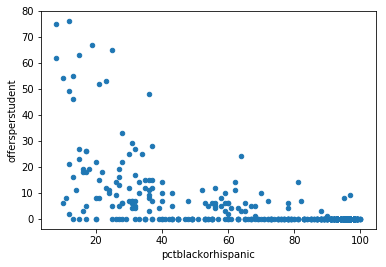

In [64]:
%matplotlib inline
nyt_df.plot.scatter('pctblackorhispanic', 'offersperstudent')